# FIFA 21 (by using web crawler) Complete Player: who are they and how they perform?

**Project context:** FIFA 21 is a football simulation video game published by Electronic Arts as part of the FIFA series. The following dataset includes lastest edition FIFA 2021 players attributes like Age, Nationality, Overall, Potential, Club, Value, Wage, etc, and we scraped the data directly from the website https://sofifa.com/ (see more in the Appendix).

**Project goal:** This project has as objective of the description of the active players all over the world and the insights generation from several selected features from the players. What's more, we apply the ***Permutation Importance algorithm*** to compare the most important features between current super stars and potential players, and apply the ***Linear Regression*** to predict overall rating for players.

**Main structure:**
1.   Project preparation
2.   Data cleaning
3.   Descriptive analysis
4.   Business insight analysis
5.   Modeling
6.   Appendix - Raw data collection from website

**Group member:**
>Hongyu CHEN (B00781057)

>Jingwei CHENG (B00742428）

>Mengdi ZHAO (B00722223)

>Yihang ZHOU (B00781113)

# 1.Project preparation

In [ ]:
pip install eli5

In [ ]:
# Libiraries imports

# Data
from google.colab import drive
drive.mount('/content/drive/')

# Fundamentals
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objs as go

# Astuces
import warnings
warnings.filterwarnings('ignore')
# You will be required for the access code, just use the url link shown to login then copy the code and come back.

# Modelling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import eli5
from eli5.sklearn import PermutationImportance
from IPython.display import display

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Install Penmutation Importance package

In [ ]:
# Load data from csv file on the drive
df = pd.read_csv('../content/drive/Shareddrives/Python Course Project/fifa_new.csv')

In [ ]:
# Check sample 5
df.head()

,Unnamed: 0,ID,picture,Nationality,name,age,position,overall,potential,club,value,wage,weak_foot,skill_moves,reputation,weight,height,Work Rate,Body Type,Real Face,release_clause,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,composure,Defensive Awareness,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,0,255043,https://cdn.sofifa.com/players/255/043/21_60.png,United States,Daryl Dike,20,ST,69,81,Barnsley,€3.4M,€4K,4,2,1,220,6.2,High/ Low,Stocky (185+),No,NaN,30,69,64,57,47,64,33,33,35,66,66,74,53,67,50,80,71,59,96,60,60,15,66,50,65,52,15.0,15,10,11,9,15,11,13
1,1,228093,https://cdn.sofifa.com/players/228/093/21_60.png,France,Marcus Thuram,22,LM,79,85,Borussia Mönchengladbach,€28M,€37K,3,3,1,192,6.4,Medium/ Medium,Normal (185+),No,€53.2M,74,81,80,75,70,84,66,30,62,79,79,85,74,79,54,82,68,79,86,75,53,45,80,76,70,74,43.0,49,37,11,13,14,9,15
2,2,247361,https://cdn.sofifa.com/players/247/361/21_60.png,United States,Brenden Aaronson,19,CAM,70,81,FC Red Bull Salzburg,€3.4M,€9K,3,3,1,148,5.1,High/ Medium,Lean (170-185),No,€5.8M,55,64,37,70,51,72,50,35,64,72,80,76,82,63,80,61,53,71,50,63,53,51,68,69,41,67,57.0,51,41,12,13,7,7,13
3,3,230872,https://cdn.sofifa.com/players/230/872/21_60.png,Belgium,Mile Svilar,20,GK,67,78,SL Benfica,€1.9M,€2K,3,1,1,183,6.2,Medium/ Medium,Normal (185+),No,€4.2M,18,14,22,37,16,19,23,22,32,22,60,55,66,67,54,47,71,32,61,18,28,13,9,48,37,41,12.0,21,18,70,64,63,64,68
4,4,252145,https://cdn.sofifa.com/players/252/145/21_60.png,Portugal,Nuno Alexandre Tavares Mendes,18,LWB,77,87,Sporting CP,€21M,€4K,4,3,1,154,5.9,High/ Medium,Normal (170-185),No,€46.2M,74,45,67,71,54,72,66,59,68,75,82,86,82,76,76,80,65,76,69,63,67,75,72,59,45,75,73.0,76,73,7,8,8,12,15


In [ ]:
# Show all columns info
df.columns

Index(['Unnamed: 0', 'ID', 'picture', 'Nationality', 'name', 'age', 'position',
       'overall', 'potential', 'club', 'value', 'wage', 'weak_foot',
       'skill_moves', 'reputation', 'weight', 'height', 'Work Rate',
       'Body Type', 'Real Face', 'release_clause', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Dribbling', 'Curve',
       'FK Accuracy', 'Long Passing', 'Ball Control', 'Acceleration',
       'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Shot Power',
       'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'composure',
       'Defensive Awareness', 'Standing Tackle', 'Sliding Tackle', 'GK Diving',
       'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes'],
      dtype='object')

In [ ]:
# Check data type and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15075 entries, 0 to 15074
Data columns (total 55 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           15075 non-null  int64  
 1   ID                   15075 non-null  int64  
 2   picture              14155 non-null  object 
 3   Nationality          15075 non-null  object 
 4   name                 15075 non-null  object 
 5   age                  15075 non-null  int64  
 6   position             15075 non-null  object 
 7   overall              15075 non-null  int64  
 8   potential            15075 non-null  int64  
 9   club                 14783 non-null  object 
 10  value                15075 non-null  object 
 11  wage                 15075 non-null  object 
 12  weak_foot            15075 non-null  int64  
 13  skill_moves          15075 non-null  int64  
 14  reputation           15075 non-null  int64  
 15  weight               15075 non-null 

In [ ]:
# Some basic statistical numbers
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,15075.0,7537.000000,4351.921989,0.0,3768.5,7537.0,11305.5,15074.0
ID,15075.0,223469.395025,34425.902953,28.0,206569.0,232756.0,246608.5,262264.0
age,15075.0,24.664080,5.058939,16.0,21.0,24.0,28.0,47.0
overall,15075.0,66.978706,7.118885,45.0,62.0,67.0,72.0,93.0
potential,15075.0,72.600995,5.871637,46.0,69.0,72.0,76.0,95.0
weak_foot,15075.0,2.982753,0.679380,1.0,3.0,3.0,3.0,5.0
skill_moves,15075.0,2.453665,0.793799,1.0,2.0,2.0,3.0,5.0
reputation,15075.0,1.148259,0.451997,1.0,1.0,1.0,1.0,5.0
weight,15075.0,165.414328,15.763553,106.0,154.0,165.0,176.0,243.0
height,15075.0,5.802665,0.448278,5.1,5.2,5.9,6.1,6.9


# 2.Data cleaning

In [ ]:
# Making a copy of the original df to clean it
df_clean = df.copy()
# Define useless columns to be removed
cols = ['ID','picture','Unnamed: 0','Real Face']
# Drop the useless columns
# It's better to make a list of the columns and then drop them all at once
df_clean.drop(columns=cols,inplace=True)

In [ ]:
# Value, Wage and Release Clause Conversion
def value_and_wage_conversion(value):
    if isinstance(value,str):
        out = value.replace('€', '')
        if 'M' in out:
            out = float(out.replace('M', ''))*1000000
        elif 'K' in value:
            out = float(out.replace('K', ''))*1000
        return float(out)

df_clean['value'] = df_clean['value'].apply(lambda x: value_and_wage_conversion(x))
df_clean['wage'] = df_clean['wage'].apply(lambda x: value_and_wage_conversion(x))
df_clean['release_clause'] = df_clean['release_clause'].apply(lambda x: value_and_wage_conversion(x))
df_clean['release_clause'].fillna(df_clean['release_clause'].mean(), inplace = True)

In [ ]:
# Split the Work Rate Column in two
tempwork = df_clean["Work Rate"].str.split("/ ", n = 1, expand = True) 
# Create new column for first work rate
df_clean["Attacking"]= tempwork[0]   
# Create new column for second work rate
df_clean["Defensive"]= tempwork[1]
# Drop original columns used
df_clean = df_clean.drop(['Work Rate'], axis = 1)

In [ ]:
# Split the Body Type Column in two
tempwork = df_clean["Body Type"].str.split("(", n = 1, expand = True) 
df_clean["BodyType"]= tempwork[0]   
df_clean["BodyType2"]= tempwork[1]
# Drop original columns used
df_clean = df_clean.drop(['Body Type','BodyType2'], axis = 1)

In [ ]:
# Dropping na values and checking if there is any left 
df_clean.dropna(inplace=True)
df_clean.isnull().sum()

Nationality            0
name                   0
age                    0
position               0
overall                0
potential              0
club                   0
value                  0
wage                   0
weak_foot              0
skill_moves            0
reputation             0
weight                 0
height                 0
release_clause         0
Crossing               0
Finishing              0
Heading Accuracy       0
Short Passing          0
Volleys                0
Dribbling              0
Curve                  0
FK Accuracy            0
Long Passing           0
Ball Control           0
Acceleration           0
Sprint Speed           0
Agility                0
Reactions              0
Balance                0
Shot Power             0
Jumping                0
Stamina                0
Strength               0
Long Shots             0
Aggression             0
Interceptions          0
Positioning            0
Vision                 0
Penalties              0


In [ ]:
# Check the new df_clean
df_clean.info()
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13691 entries, 0 to 15074
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Nationality          13691 non-null  object 
 1   name                 13691 non-null  object 
 2   age                  13691 non-null  int64  
 3   position             13691 non-null  object 
 4   overall              13691 non-null  int64  
 5   potential            13691 non-null  int64  
 6   club                 13691 non-null  object 
 7   value                13691 non-null  float64
 8   wage                 13691 non-null  float64
 9   weak_foot            13691 non-null  int64  
 10  skill_moves          13691 non-null  int64  
 11  reputation           13691 non-null  int64  
 12  weight               13691 non-null  int64  
 13  height               13691 non-null  float64
 14  release_clause       13691 non-null  float64
 15  Crossing             13691 non-null 

,Nationality,name,age,position,overall,potential,club,value,wage,weak_foot,skill_moves,reputation,weight,height,release_clause,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,composure,Defensive Awareness,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Attacking,Defensive,BodyType
0,United States,Daryl Dike,20,ST,69,81,Barnsley,3400000.0,4000.0,4,2,1,220,6.2,6.917463e+06,30,69,64,57,47,64,33,33,35,66,66,74,53,67,50,80,71,59,96,60,60,15,66,50,65,52,15.0,15,10,11,9,15,11,13,High,Low,Stocky
1,France,Marcus Thuram,22,LM,79,85,Borussia Mönchengladbach,28000000.0,37000.0,3,3,1,192,6.4,5.320000e+07,74,81,80,75,70,84,66,30,62,79,79,85,74,79,54,82,68,79,86,75,53,45,80,76,70,74,43.0,49,37,11,13,14,9,15,Medium,Medium,Normal
2,United States,Brenden Aaronson,19,CAM,70,81,FC Red Bull Salzburg,3400000.0,9000.0,3,3,1,148,5.1,5.800000e+06,55,64,37,70,51,72,50,35,64,72,80,76,82,63,80,61,53,71,50,63,53,51,68,69,41,67,57.0,51,41,12,13,7,7,13,High,Medium,Lean
3,Belgium,Mile Svilar,20,GK,67,78,SL Benfica,1900000.0,2000.0,3,1,1,183,6.2,4.200000e+06,18,14,22,37,16,19,23,22,32,22,60,55,66,67,54,47,71,32,61,18,28,13,9,48,37,41,12.0,21,18,70,64,63,64,68,Medium,Medium,Normal
4,Portugal,Nuno Alexandre Tavares Mendes,18,LWB,77,87,Sporting CP,21000000.0,4000.0,4,3,1,154,5.9,4.620000e+07,74,45,67,71,54,72,66,59,68,75,82,86,82,76,76,80,65,76,69,63,67,75,72,59,45,75,73.0,76,73,7,8,8,12,15,High,Medium,Normal


In [ ]:
# Saving the clean df into csv to use it
df_clean.to_csv('clean_df.csv',index = False)

# 3.Descriptive analysis

## 3.1 Top 20 nationalities


England                1445
Spain                   933
Germany                 859
France                  768
Argentina               734
Brazil                  561
Italy                   411
Netherlands             354
Mexico                  350
United States           341
Portugal                285
Colombia                261
Scotland                247
Sweden                  232
Poland                  231
Republic of Ireland     229
Belgium                 227
Uruguay                 225
Japan                   224
Norway                  209
Name: Nationality, dtype: int64
--------------------------------------------------------------------------------

European countries have most players


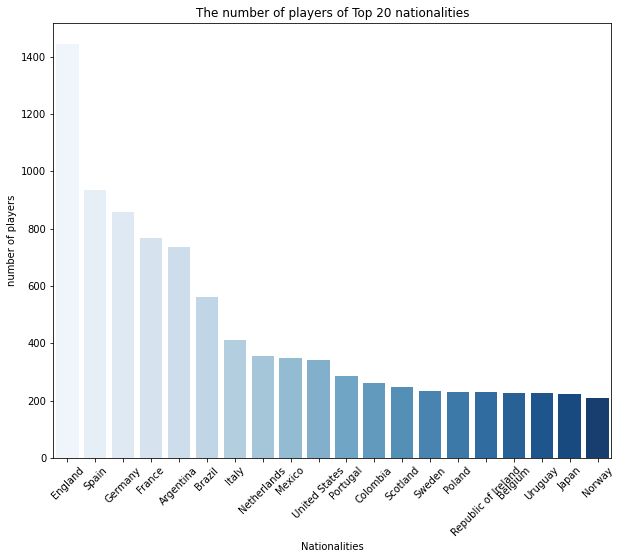

In [ ]:
# Top 20 nations with players
nationality_vals = df_clean.Nationality.value_counts()
print(nationality_vals.head(20))
print('--'*40)
print("\nEuropean countries have most players")

p=nationality_vals.head(20)
plt.figure(figsize=[10,8])
sns.barplot(x=p.keys(),y=p,palette="Blues")
plt.xlabel('Nationalities')
plt.ylabel('number of players')
plt.title('The number of players of Top 20 nationalities')
plt.xticks(rotation=45);

## 3.2 Player age distribution


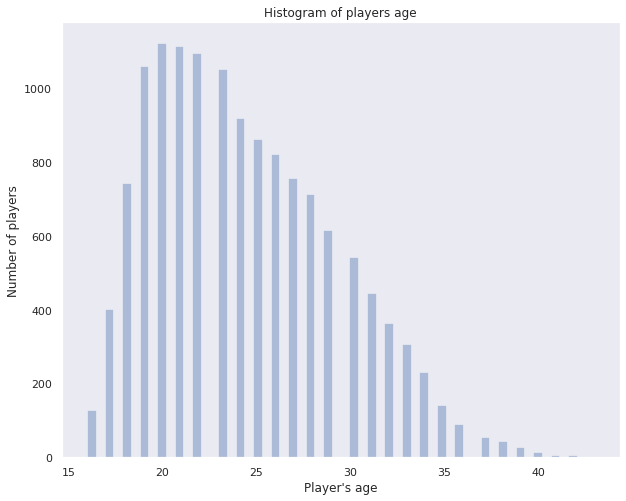

In [ ]:
# Number of players's age
sns.set(style ="dark")
x = df_clean.age
plt.figure(figsize=[10,8])
ax = sns.distplot(x, bins = 58, kde = False)
ax.set_xlabel(xlabel="Player\'s age")
ax.set_ylabel(ylabel='Number of players')
ax.set_title(label='Histogram of players age')
plt.show()

Most players are 19-23 years old



## 3.3 Best players


### Highest potential/overall rating

In [ ]:
# Player with maximum Potential and Overall Performance
print('Maximum Potential : '+str(df_clean.loc[df_clean['potential'].idxmax()][1]))
print('Maximum Overall Perforamnce : '+str(df_clean.loc[df_clean['overall'].idxmax()][1]))

Maximum Potential : Kylian Mbappé
Maximum Overall Perforamnce : Lionel Messi


### Most expensive players

In [ ]:
# Top earners by value and wage
print('Most valued player : '+str(df_clean.loc[df_clean['value'].idxmax()][1]))
print('Highest earner : '+str(df_clean.loc[df_clean['wage'].idxmax()][1]))


Most valued player : Kylian Mbappé
Highest earner : Lionel Messi


### Best players in differnet aspects 

In [ ]:
pr_cols=['Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Aggression', 'Defensive Awareness','Interceptions', 'Positioning', 'Vision', 'Penalties',
       'composure','Standing Tackle', 'Sliding Tackle', 'GK Diving',
       'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']
print('Best in differnet aspects :')
print('_________________________\n\n')
i=0
while i < len(pr_cols):
    print('Best {0} : {1}'.format(pr_cols[i],df_clean.loc[df_clean[pr_cols[i]].idxmax()][1]))
    i += 1

Best in differnet aspects :
_________________________


Best Crossing : Kevin De Bruyne
Best Finishing : C. Ronaldo dos Santos Aveiro
Best Heading Accuracy : Luuk de Jong
Best Short Passing : Kevin De Bruyne
Best Volleys : Luis Suárez
Best Dribbling : Lionel Messi
Best Curve : Ricardo Andrade Quaresma Bernardo
Best FK Accuracy : Lionel Messi
Best Long Passing : Kevin De Bruyne
Best Ball Control : Lionel Messi
Best Acceleration : Adama Traoré Diarra
Best Sprint Speed : Kylian Mbappé
Best Agility : Neymar da Silva Santos Jr.
Best Reactions : C. Ronaldo dos Santos Aveiro
Best Balance : Erhun Oztumer
Best Shot Power : Aleksandar Kolarov
Best Jumping : C. Ronaldo dos Santos Aveiro
Best Stamina : N'Golo Kanté
Best Strength : Adebayo Akinfenwa
Best Long Shots : Lionel Messi
Best Aggression : Klaus Gjasula
Best Defensive Awareness : Virgil van Dijk
Best Interceptions : N'Golo Kanté
Best Positioning : Thomas Müller
Best Vision : Lionel Messi
Best Penalties : Neymar da Silva Santos Jr.
Best comp

## 3.4 FIFA club analysis


### Top 10 largest clubs

Total number of clubs : 867
Tottenham Hotspur           41
Real Betis                  38
Newcastle United            38
Borussia Mönchengladbach    37
Everton                     36
Wolverhampton Wanderers     36
Fulham                      36
RCD Espanyol                36
Norwich City                36
Real Sociedad               36
Name: club, dtype: int64


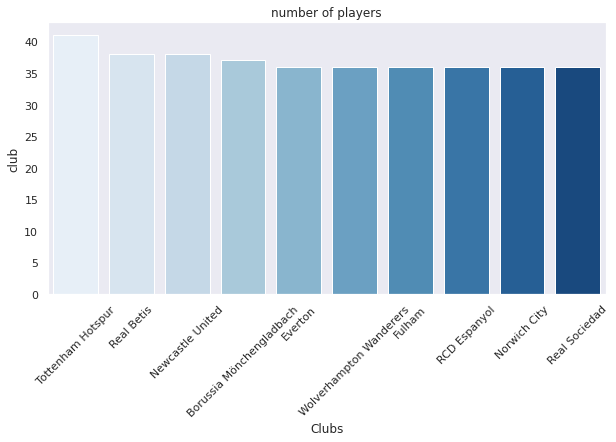

In [ ]:
# Total number of clubs present and top 10 clubs with highest number of players
print('Total number of clubs : {0}'.format(df['club'].nunique()))
print(df_clean['club'].value_counts().head(10))

p=df_clean['club'].value_counts().head(10)
plt.figure(figsize=[10,5])
sns.barplot(x=p.keys(),y=p,palette="Blues")
plt.xlabel('Clubs')
plt.title('number of players')
plt.xticks(rotation=45);

### Top 10 valuable clubs

In [ ]:
# Total value of players in clubs
value = df_clean.groupby(['club'],as_index=False)['value'].sum()
# Select top 10 clubs
top10_v = value.sort_values(ascending = False,by='value')[:10]
top10_v['value'] = top10_v['value']/10**3
top10_v


,club,value
446,Manchester City,1226475.0
432,Liverpool,1147100.0
562,Real Madrid,1034700.0
256,FC Bayern München,1006600.0
516,Paris Saint-Germain,980525.0
75,Atlético Madrid,904000.0
254,FC Barcelona,895050.0
447,Manchester United,833840.0
692,Tottenham Hotspur,780040.0
391,Juventus,744600.0


### Top 10 generous clubs

In [ ]:
# Top 10 clubs that pays highest wage
wage = df_clean.groupby(['club'],as_index=False)['wage'].sum()
top10_w = wage.sort_values(ascending = False,by='wage')[:10]
top10_w['wage'] = top10_w['wage']/10**3
top10_w

,club,wage
562,Real Madrid,4290.00
254,FC Barcelona,3936.85
446,Manchester City,3557.70
432,Liverpool,2954.00
447,Manchester United,2746.00
692,Tottenham Hotspur,2412.00
380,Inter,2297.00
516,Paris Saint-Germain,2242.25
158,Chelsea,2131.00
256,FC Bayern München,2022.00


## 3.5 Player position distribution


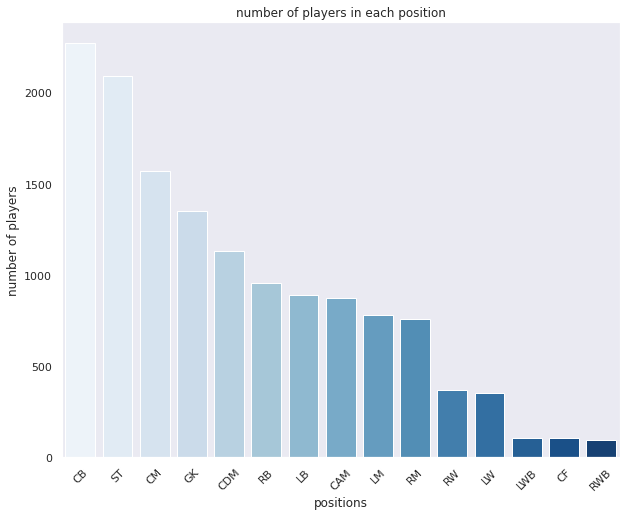

In [ ]:
# Number of players in different positions
p = df_clean.position.value_counts()
plt.figure(figsize=[10,8])
sns.barplot(x=p.keys(),y=p,palette="Blues")
plt.xlabel('positions')
plt.ylabel('number of players')
plt.title('number of players in each position')
plt.xticks(rotation=45);

# 4.Business insight analysis

In [ ]:
# Make a copy for the following analysis
df1=df_clean.copy()

### 4.1 Players evolution by age

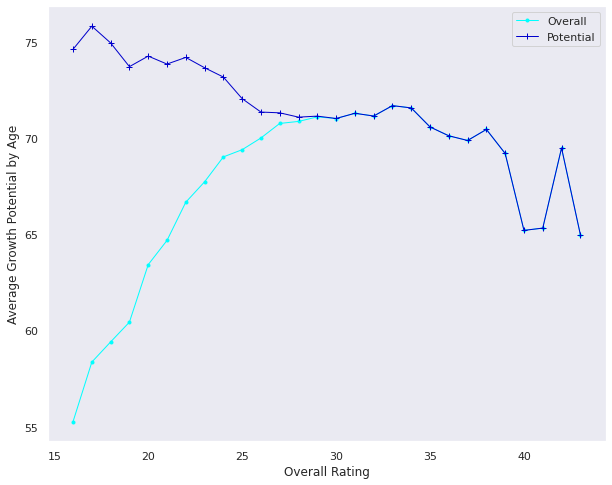

In [ ]:
# Evolution of overall rating and potential by age
overall = pd.DataFrame(df1.groupby(["age"])['overall'].mean())
potential = pd.DataFrame(df1.groupby(["age"])['potential'].mean())
merged = pd.merge(overall, potential, on='age', how='inner')
merged['age']= merged.index

fig, ax = plt.subplots(figsize=(10,8))
merged.reset_index(drop = True, inplace = True)
plt.plot('age', 'overall', data=merged, marker='.', color='#00ffff', lw=1, label ="Overall" )
plt.plot('age', 'potential', data=merged, marker='+', color='#0000cc', lw=1, label = "Potential")
plt.xlabel('Overall Rating')
plt.ylabel('Average Growth Potential by Age')
plt.legend();

*   The gap between overall rating and potential shrinks as age grows, and players achieve their full potential at around 30.
*   Seen from the plot, the golden age for football players should be 25-35, when full potential is played out and avg rating is high.

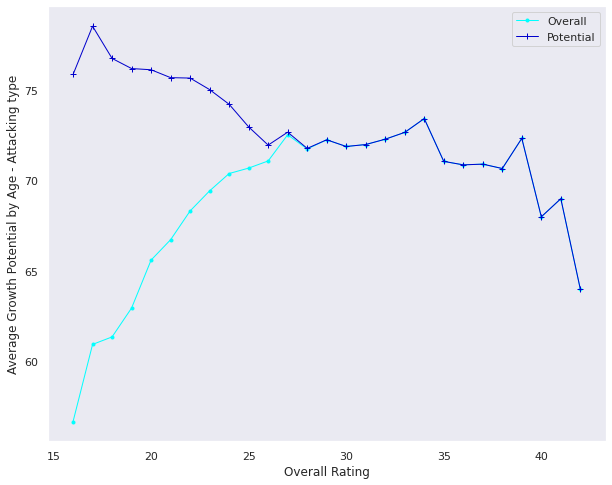

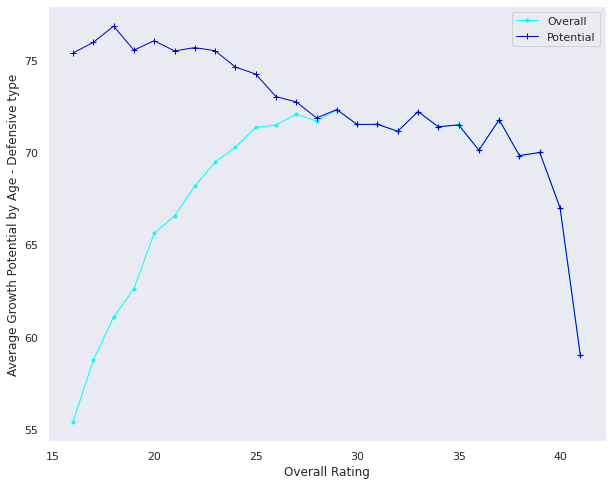

In [ ]:
# Test whether different working rates (A/D type) will influence the evolution
# Seperate A-high and D-high
df_a=df1.query("Attacking == 'High'")
df_d=df1.query("Defensive == 'High'")
# Plot two charts
overall = pd.DataFrame(df_a.groupby(["age"])['overall'].mean())
potential = pd.DataFrame(df_a.groupby(["age"])['potential'].mean())
merged = pd.merge(overall, potential, on='age', how='inner')
merged['age']= merged.index
fig, ax = plt.subplots(figsize=(10,8))
merged.reset_index(drop = True, inplace = True)
plt.plot('age', 'overall', data=merged, marker='.', color='#00ffff', lw=1, label ="Overall" )
plt.plot('age', 'potential', data=merged, marker='+', color='#0000cc', lw=1, label = "Potential")
plt.xlabel('Overall Rating')
plt.ylabel('Average Growth Potential by Age - Attacking type')
plt.legend();

overall = pd.DataFrame(df_d.groupby(["age"])['overall'].mean())
potential = pd.DataFrame(df_d.groupby(["age"])['potential'].mean())
merged = pd.merge(overall, potential, on='age', how='inner')
merged['age']= merged.index
fig, ax = plt.subplots(figsize=(10,8))
merged.reset_index(drop = True, inplace = True)
plt.plot('age', 'overall', data=merged, marker='.', color='#00ffff', lw=1, label ="Overall" )
plt.plot('age', 'potential', data=merged, marker='+', color='#0000cc', lw=1, label = "Potential")
plt.xlabel('Overall Rating')
plt.ylabel('Average Growth Potential by Age - Defensive type')
plt.legend();

*   High defensive players reach maximum potential a little bit later than high attacking players (2-3 years)

### 4.2 BMI & work type

In [ ]:
# Exchange weight unit to "kg" and height unit to "m"
df1['new height']=df1['height']/3.28
df1['new weight']=df1['weight']*0.4536
# Define BMI
df1['BMI']=df1['new weight']/(df1['new height']**2)
# Calculate BMI per work type
bmi = df1.groupby(['Attacking','Defensive'])['BMI'].mean().reset_index()
bmi['Attacking']='A-'+bmi['Attacking']
bmi['Defensive']='D-'+bmi['Defensive']
bmi

,Attacking,Defensive,BMI
0,A-High,D-High,24.889050
1,A-High,D-Low,24.413570
2,A-High,D-Medium,24.593667
3,A-Low,D-High,24.225488
4,A-Low,D-Low,25.539579
5,A-Low,D-Medium,23.376352
6,A-Medium,D-High,24.093767
7,A-Medium,D-Low,24.339647
8,A-Medium,D-Medium,24.101309


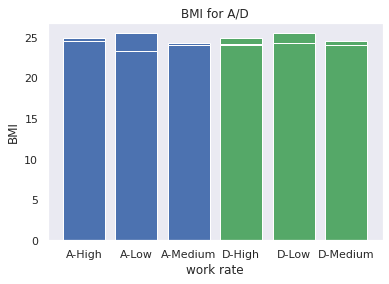

In [ ]:
# Plot bar chart for A/D type and different BMI level
x1 = bmi['Attacking']
y1 = bmi['BMI']

x2 = bmi['Defensive']
y2 = bmi['BMI']

plt.bar(x1, y1, label="Attacking", color='b')
plt.bar(x2, y2, label="Defensive", color='g')
plt.plot()

plt.xlabel("work rate")
plt.ylabel("BMI")
plt.title("BMI for A/D")
#plt.legend()
plt.show()

* High performancers in both attacking and defensive types have normal weight(BMI close to 25). While low performancers are a little overweighted in average.

### 4.3 Relation between club value and nationality

In [ ]:
# Calculate total value and number of nationalities for each club
club1 = df1.groupby(['club'])['Nationality','name'].count().reset_index()
club2 = df1.groupby(['club'])['value'].sum().reset_index()
club=club1[['club','Nationality']]
club['value']=club2['value']
club

,club,Nationality,value
0,1. FC Heidenheim 1846,12,18550000.0
1,1. FC Kaiserslautern,18,14825000.0
2,1. FC Köln,29,113150000.0
3,1. FC Magdeburg,13,8375000.0
4,1. FC Nürnberg,20,38475000.0
...,...,...,...
770,Zamora FC,3,1500000.0
771,Çaykur Rizespor,18,33650000.0
772,Örebro SK,11,6180000.0
773,Östersunds FK,18,8725000.0


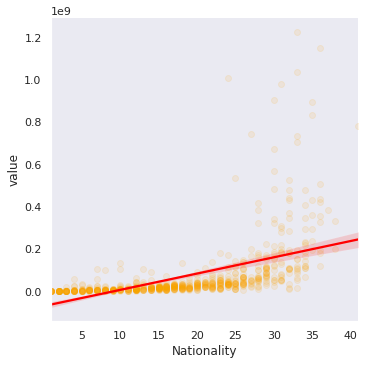

In [ ]:
# Test the relationship between # of nationality and value
sns.lmplot(x = 'Nationality', y = 'value', data = club,scatter_kws = {'alpha':0.1,'color':'orange'},
           line_kws={'color':'red'})

*   Seems more composition of nationalities will lead to higher values of the club.

### 4.4 Famous clubs' willingness to pay (WTP)

In [ ]:
# Calculate WTP
df1["WTP per rating"]=df1["wage"]/df1["overall"]
df1["WTP per potential"]=df1["wage"]/df1["potential"]
# Select some famous clubs as samples
some_clubs = ('Juventus', 'Real Madrid', 'Paris Saint-Germain', 'FC Barcelona', 'Manchester United',  'Liverpool')
df_club = df1.loc[df1['club'].isin(some_clubs)]

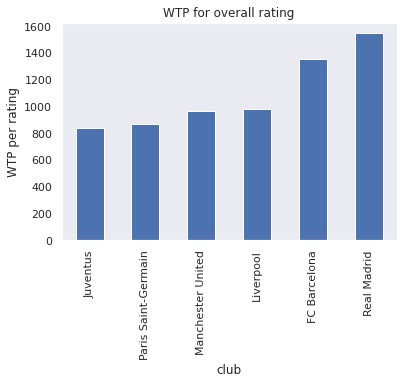

In [ ]:
df_club.groupby(['club'])["WTP per rating"].mean().sort_values().plot.bar()
plt.xlabel("club")
plt.ylabel("WTP per rating")
plt.title("WTP for overall rating")
plt.show()

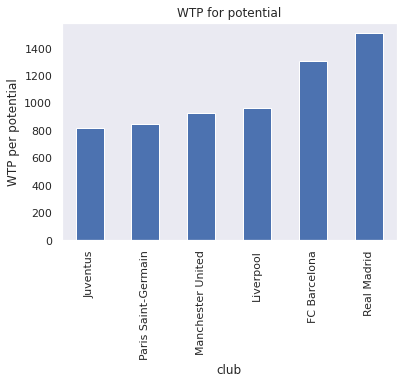

In [ ]:
df_club.groupby(['club'])["WTP per potential"].mean().sort_values().plot.bar()
plt.xlabel("club")
plt.ylabel("WTP per potential")
plt.title("WTP for potential")
plt.show()

*   Among these famous clubs, Real Madrid is the most generous club to pay for both overall rating and potential. It has the highest financial attractiveness.

### 4.5 Famous clubs' team distribution

Text(0.5, 1.0, 'Distribution of age in some clubs')

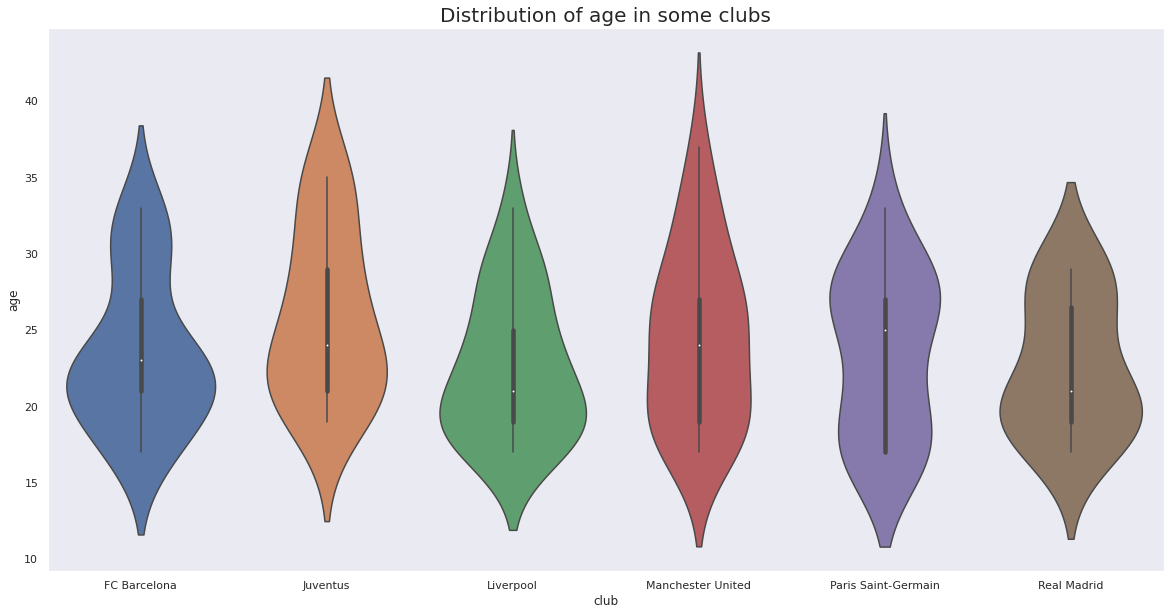

In [ ]:
# Compare Famous EU clubs in relation to age
df_club = df1.loc[df1['club'].isin(some_clubs) & df1['age']].sort_values(by=['club'])
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax = sns.violinplot(x="club", y="age", data=df_club)
ax.set_title(label='Distribution of age in some clubs', fontsize=20)

*   Real Madrid focus more on young players (less than 35) compared to other clubs
*   Manchester United has the most even age distribution 
*   Paris Saint-Germain has an elder team, while Liverpool has a younger team.

## 4.6 A simple guide for watching European Cup


In [ ]:
EU_Cup_countries=['Turkey', 'Italy', 'Wales', 'Switzerland','Denmark', 'Finland', 'Belgium', 'Russia','Netherlands', 'Ukraine', 'Austria', 'North Macedonia','England', 'Croatia', 'Scotland', 'Czech Republic','Spain', 'Sweden', 'Poland', 'Slovakia','Hungary', 'Portugal', 'France', 'Germany']
A_Group=['Turkey', 'Italy', 'Wales', 'Switzerland']
B_Group=['Denmark', 'Finland', 'Belgium', 'Russia']
C_Group=['Netherlands', 'Ukraine', 'Austria', 'North Macedonia']
D_Group=['England', 'Croatia', 'Scotland', 'Czech Republic']
E_Group=['Spain', 'Sweden', 'Poland', 'Slovakia']
F_Group=['Hungary', 'Portugal', 'France', 'Germany']
da_Eu_cup = df_clean.query("Nationality in @EU_Cup_countries")
da_Eu_cup.sort_values(['Nationality','overall'],ascending=[1,0],inplace=True)

grouped = da_Eu_cup.groupby(['Nationality']).head(25)
value_rank=pd.pivot_table(grouped, values='overall',index='Nationality',aggfunc=np.mean).sort_values(['overall'],ascending= False).reset_index()
for i in ['A','B','C','D','E','F']:
  value_rank.loc[value_rank.Nationality.isin(globals()[f'{i}_Group']),'group']= i



### Hell mode: F group 

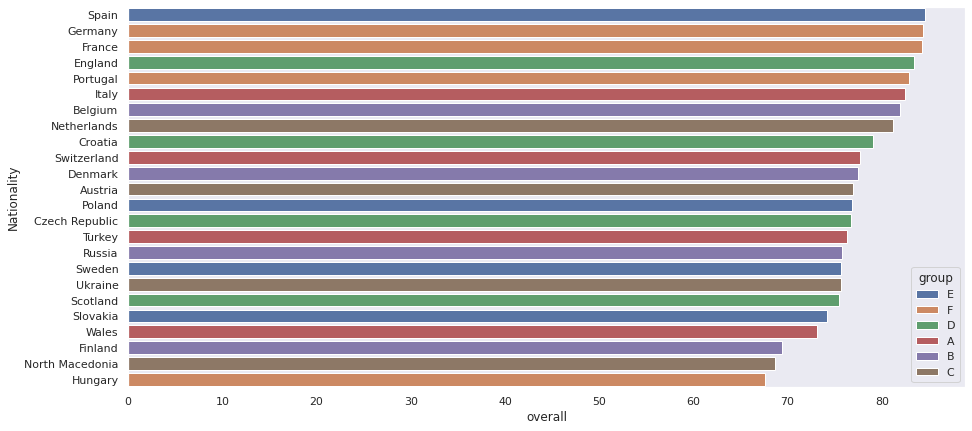

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(value_rank.overall,value_rank.Nationality,hue=value_rank.group,dodge=False)

In [ ]:
da_Eu_cup.sort_values(['Nationality','reputation'],ascending=[1,0],inplace=True)
grouped = da_Eu_cup.groupby(['Nationality']).head(25)
reputation_rank=pd.pivot_table(grouped, values='reputation',index='Nationality',aggfunc=np.mean).sort_values(['reputation'],ascending= False).reset_index()
for i in ['A','B','C','D','E','F']:
  reputation_rank.loc[reputation_rank.Nationality.isin(globals()[f'{i}_Group']),'group']= i

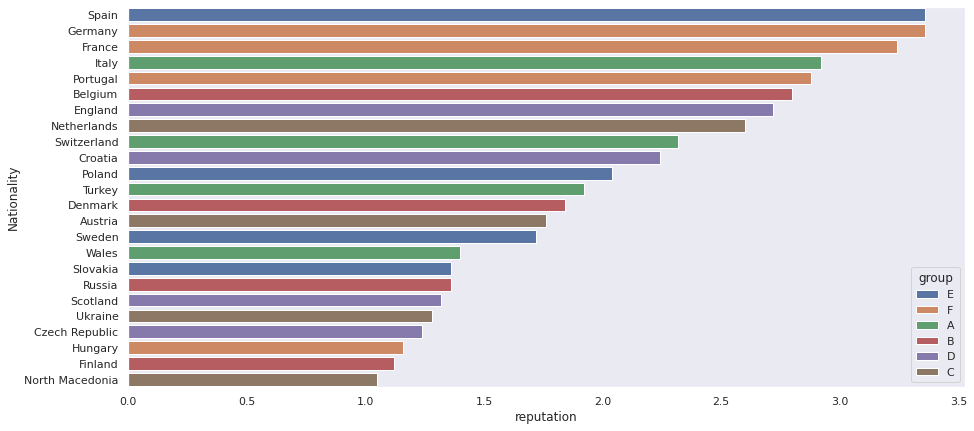

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(reputation_rank.reputation,reputation_rank.Nationality,hue=reputation_rank.group,dodge=False)


* F group: there are three super teams in group F: Germany, 
France, Portugal. All of them are the teams with players of highest overall ability and reputation. Getting out of this group can be an impossible mission for Hungary and the three super teams will be fighting hard to get quanlified for next stage.

###Best players of each team

In [ ]:
da_Eu_cup.sort_values(['Nationality','overall'],ascending=[1,0],inplace=True)
mvp = da_Eu_cup.groupby(['Nationality']).head(1)
mvp

,Nationality,name,age,position,overall,potential,club,value,wage,weak_foot,skill_moves,reputation,weight,height,release_clause,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,composure,Defensive Awareness,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Attacking,Defensive,BodyType
25,Austria,Marcel Sabitzer,26,CM,84,85,RB Leipzig,49500000.0,81000.0,4,3,3,168,5.10,8.790000e+07,74,81,60,84,82,79,76,78,81,82,76,83,75,86,80,88,71,85,76,88,77,66,83,83,72,80,71.0,70,59,11,13,14,15,13,High,High,Normal
157,Belgium,Kevin De Bruyne,29,CM,91,91,Manchester City,127500000.0,370000.0,5,4,4,154,5.11,2.359000e+08,94,82,55,94,82,88,85,83,93,92,77,77,79,91,78,91,63,89,74,91,76,66,88,94,83,91,68.0,65,53,15,13,5,10,13,High,High,Unique
300,Croatia,Luka Modrić,34,CM,87,87,Real Madrid,36500000.0,260000.0,4,4,4,146,5.80,7.480000e+07,86,72,55,91,76,85,85,78,89,90,76,70,91,88,92,79,67,83,58,82,62,80,78,90,82,92,70.0,75,71,13,9,7,14,9,Medium,Medium,Lean
252,Czech Republic,Tomáš Souček,25,CDM,82,86,West Ham United,38500000.0,50000.0,3,3,1,190,6.40,7.600000e+07,69,72,83,81,59,74,63,53,76,77,61,69,66,81,60,72,82,92,84,70,75,83,75,72,70,78,81.0,82,79,11,13,5,6,8,High,High,Lean
1103,Denmark,Kasper Schmeichel,33,GK,85,85,Leicester City,17500000.0,100000.0,3,1,2,196,6.20,3.330000e+07,18,12,16,44,15,12,13,15,46,40,45,51,61,82,47,60,60,34,64,14,35,20,13,59,26,67,14.0,14,13,84,78,80,83,90,Medium,Medium,Stocky
119,England,Harry Kane,26,ST,89,90,Tottenham Hotspur,123000000.0,230000.0,5,3,3,196,6.20,2.429000e+08,77,94,86,84,87,81,83,68,86,85,66,69,69,92,71,91,79,84,85,86,80,44,93,86,91,91,63.0,36,38,8,10,11,14,11,High,High,Unique
1375,Finland,Lukáš Hrádecký,30,GK,83,83,Bayer 04 Leverkusen,24000000.0,64000.0,3,1,2,181,6.40,4.080000e+07,11,11,11,30,9,10,11,15,33,20,38,44,43,82,39,52,69,34,55,14,31,18,9,53,20,48,10.0,10,13,85,78,69,83,87,Medium,Medium,Lean
44,France,Kylian Mbappé,21,ST,90,95,Paris Saint-Germain,185500000.0,160000.0,4,5,3,161,5.10,3.571000e+08,78,91,73,83,83,92,79,63,70,90,96,96,92,92,82,86,77,86,76,79,62,38,91,80,80,84,34.0,34,32,13,5,7,11,6,High,Low,Unique
479,Germany,Manuel Neuer,34,GK,90,90,FC Bayern München,20500000.0,135000.0,4,1,5,205,6.40,3.380000e+07,15,13,25,60,11,30,14,11,68,46,54,60,51,87,35,68,77,43,80,16,29,30,12,70,47,70,17.0,10,11,88,88,91,88,89,Medium,Medium,Unique
1250,Hungary,Péter Gulácsi,30,GK,85,85,RB Leipzig,36000000.0,65000.0,2,1,2,190,6.30,6.120000e+07,16,10,23,35,10,19,18,11,31,25,42,44,41,82,42,62,67,35,74,12,34,23,11,42,24,45,25.0,16,20,84,85,82,84,86,Medium,Medium,Normal


###Future stars

In [ ]:
da_Eu_cup[da_Eu_cup['age']<25].sort_values(['potential'],ascending=[0]).head(5)

,Nationality,name,age,position,overall,potential,club,value,wage,weak_foot,skill_moves,reputation,weight,height,release_clause,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,composure,Defensive Awareness,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Attacking,Defensive,BodyType
44,France,Kylian Mbappé,21,ST,90,95,Paris Saint-Germain,185500000.0,160000.0,4,5,3,161,5.10,357100000.0,78,91,73,83,83,92,79,63,70,90,96,96,92,92,82,86,77,86,76,79,62,38,91,80,80,84,34.0,34,32,13,5,7,11,6,High,Low,Unique
53,Portugal,João Félix Sequeira,20,CF,83,93,Atlético Madrid,80500000.0,61000.0,4,5,1,154,5.11,181100000.0,73,82,69,80,82,87,82,64,67,87,81,83,85,83,80,80,73,75,64,81,69,38,84,82,68,84,30.0,42,35,13,12,14,13,14,Medium,Medium,Lean
67,Italy,Gianluigi Donnarumma,21,GK,86,92,Milan,88500000.0,37000.0,3,1,3,198,6.50,168200000.0,12,12,12,36,8,28,12,14,34,30,50,55,64,80,38,57,72,34,72,18,30,26,14,60,24,68,20.0,14,16,89,81,76,84,89,Medium,Medium,Unique
45,England,Jadon Sancho,20,RM,87,92,Borussia Dortmund,118500000.0,82000.0,3,5,3,168,5.11,210300000.0,82,81,38,87,83,92,84,65,70,90,86,80,91,85,90,73,51,77,67,65,44,39,82,87,65,85,32.0,41,32,7,11,10,11,13,High,Medium,Normal
21,England,Phil Foden,20,CAM,83,92,Manchester City,79500000.0,115000.0,3,4,1,152,5.70,163000000.0,75,79,47,84,59,85,73,59,77,87,83,79,89,82,90,82,49,76,44,70,64,59,81,82,64,81,58.0,59,47,8,15,6,10,13,High,Medium,Lean


### Player feature analysis

Context: Denmark midfielder **Christian Eriksen** collapsed to the field at Euro 2020 on Saturday (12/06/2021). Hope he will recover soon. Here we use him as an example to do feature analysis.

In [ ]:
x = da_Eu_cup[da_Eu_cup['name']=='Christian Eriksen'] # change the name as you want
data = [go.Scatterpolar(
  r = [x['Crossing'].values[0],
       x['Finishing'].values[0],
       x['Short Passing'].values[0],
       x['Dribbling'].values[0],
       x['Long Passing'].values[0],
       x['Ball Control'].values[0],
       x['Strength'].values[0],
       x['Defensive Awareness'].values[0],
       x['Acceleration'].values[0]],
  theta = ['Crossing','Finishing','Short Passing','Dribbling','Long Passing','Ball Control','Strength','Defensive Awareness','Acceleration'],
  fill = 'toself',
     line =  dict(
            color = 'orange'
        )
)]

layout = go.Layout(
  polar = dict(
    radialaxis = dict(
      visible = True,
      range = [0, 100]
    )
  ),
  showlegend = False,
  title = "{} stats distribution".format(x['name'].values[0])
)
fig = go.Figure(data=data, layout=layout)
fig.layout.images = [dict(
        source="https://imgresizer.eurosport.com/unsafe/1200x0/filters:format(jpeg):focal(1561x436:1563x434)/origin-imgresizer.eurosport.com/2021/06/13/3152444-64604608-2560-1440.jpg",        
    xref="paper", yref="paper",
        x=1.0, y=0.3,
        sizex=0.6, sizey=0.6,
        xanchor="center", yanchor="bottom"

      )]

fig.show()

# 5.Modeling

## 5.1 The most important features for the overall rating of different positions

In [ ]:
# Simplify the position information
def simple_position(df):
    if (df['position'] == 'GK'):
        return 'GK'
    elif ((df['position'] == 'RB') | (df['position'] == 'LB') | (df['position'] == 'CB') | (df['position'] == 'LCB') | (df['position'] == 'RCB') | (df['position'] == 'RWB') | (df['position'] == 'LWB') ):
        return 'DF'
    elif ((df['position'] == 'LDM') | (df['position'] == 'CDM') | (df['position'] == 'RDM')):
        return 'DM'
    elif ((df['position'] == 'LM') | (df['position'] == 'LCM') | (df['position'] == 'CM') | (df['position'] == 'RCM') | (df['position'] == 'RM')):
        return 'MF'
    elif ((df['position'] == 'LAM') | (df['position'] == 'CAM') | (df['position'] == 'RAM') | (df['position'] == 'LW') | (df['position'] == 'RW')):
        return 'AM'
    elif ((df['position'] == 'RS') | (df['position'] == 'ST') | (df['position'] == 'LS') | (df['position'] == 'CF') | (df['position'] == 'LF') | (df['position'] == 'RF')):
        return 'ST'
    else:
        return df.position
# Apply the function
df_clean['simple_position'] = df_clean.apply(simple_position, axis=1)
df_clean.head()

,Nationality,name,age,position,overall,potential,club,value,wage,weak_foot,skill_moves,reputation,weight,height,release_clause,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,composure,Defensive Awareness,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Attacking,Defensive,BodyType,simple_position
0,United States,Daryl Dike,20,ST,69,81,Barnsley,3400000.0,4000.0,4,2,1,220,6.2,6.917463e+06,30,69,64,57,47,64,33,33,35,66,66,74,53,67,50,80,71,59,96,60,60,15,66,50,65,52,15.0,15,10,11,9,15,11,13,High,Low,Stocky,ST
1,France,Marcus Thuram,22,LM,79,85,Borussia Mönchengladbach,28000000.0,37000.0,3,3,1,192,6.4,5.320000e+07,74,81,80,75,70,84,66,30,62,79,79,85,74,79,54,82,68,79,86,75,53,45,80,76,70,74,43.0,49,37,11,13,14,9,15,Medium,Medium,Normal,MF
2,United States,Brenden Aaronson,19,CAM,70,81,FC Red Bull Salzburg,3400000.0,9000.0,3,3,1,148,5.1,5.800000e+06,55,64,37,70,51,72,50,35,64,72,80,76,82,63,80,61,53,71,50,63,53,51,68,69,41,67,57.0,51,41,12,13,7,7,13,High,Medium,Lean,AM
3,Belgium,Mile Svilar,20,GK,67,78,SL Benfica,1900000.0,2000.0,3,1,1,183,6.2,4.200000e+06,18,14,22,37,16,19,23,22,32,22,60,55,66,67,54,47,71,32,61,18,28,13,9,48,37,41,12.0,21,18,70,64,63,64,68,Medium,Medium,Normal,GK
4,Portugal,Nuno Alexandre Tavares Mendes,18,LWB,77,87,Sporting CP,21000000.0,4000.0,4,3,1,154,5.9,4.620000e+07,74,45,67,71,54,72,66,59,68,75,82,86,82,76,76,80,65,76,69,63,67,75,72,59,45,75,73.0,76,73,7,8,8,12,15,High,Medium,Normal,DF


Position abbreviations are part of the football jargon:


*   GK: goalkeeper who prevents the ball from entering into the gate of his team
*   DF: defense back who mainly defends his gate against attacks from his rival team
*   DM: defense middle who not only defends but also organizes the attacks
*   MF: middle field who organizes more attacks and defends less than DM
*   AM: attack middle who mainly organizes attacks
*   ST: striker who scores for the most of the time







In [ ]:
# Drop unnecessary features
unnecessary_feature = ['Nationality','name','position','potential','club','value','wage','reputation','release_clause','Attacking','Defensive','BodyType']
df_model1 = df_clean.copy()
df_model1.drop(columns=unnecessary_feature,inplace=True)
df_model1.head()

,age,overall,weak_foot,skill_moves,weight,height,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,composure,Defensive Awareness,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,simple_position
0,20,69,4,2,220,6.2,30,69,64,57,47,64,33,33,35,66,66,74,53,67,50,80,71,59,96,60,60,15,66,50,65,52,15.0,15,10,11,9,15,11,13,ST
1,22,79,3,3,192,6.4,74,81,80,75,70,84,66,30,62,79,79,85,74,79,54,82,68,79,86,75,53,45,80,76,70,74,43.0,49,37,11,13,14,9,15,MF
2,19,70,3,3,148,5.1,55,64,37,70,51,72,50,35,64,72,80,76,82,63,80,61,53,71,50,63,53,51,68,69,41,67,57.0,51,41,12,13,7,7,13,AM
3,20,67,3,1,183,6.2,18,14,22,37,16,19,23,22,32,22,60,55,66,67,54,47,71,32,61,18,28,13,9,48,37,41,12.0,21,18,70,64,63,64,68,GK
4,18,77,4,3,154,5.9,74,45,67,71,54,72,66,59,68,75,82,86,82,76,76,80,65,76,69,63,67,75,72,59,45,75,73.0,76,73,7,8,8,12,15,DF


Reasons for dropping:

* dropped position (complicated one) for the sake of simplicity.
* dropped nationality, name and potential because of their irrelevance to the overall rating of a player.
* dropped club, value, wage, reputation and release clause because they come after when you have an outstanding overall rating.
* dropped attacking, defensive and body type because of strong potential multicollinearity with other features such as finishing, interceptions and strength.

In [ ]:
# Define a function to check the importance of features to a player's overall rating, for each position

def importance_matrix_overall(df):
  """
  Here the df should be the one filtered by different positions and thus contain only numerical values.
  """
  # Split target and predictors
  target = df.overall
  predictors = df.drop(['overall'], axis=1)
  # Test and train set separation
  X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2)
  # Standardize the data to eliminate the impact of different scales
  ss_X = StandardScaler()
  X_train = ss_X.fit_transform(X_train)
  X_test = ss_X.fit_transform(X_test)
  # Modelling
  model = LinearRegression()
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  # Evaluating the fit
  print('Model Evaluation')
  print('R-squared score: '+str(r2_score(y_test, predictions)))
  print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))
  print('---'*20)
  # Importance matrix
  perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
  display(eli5.show_weights(perm, feature_names = predictors.columns.tolist()))

In [ ]:
# Loop on every simplified positions to see the most important features for each simplified position
for position in df_model1['simple_position'].unique():
  df_sub = df_model1[df_model1['simple_position'] == position]
  df_sub = df_sub.drop(['simple_position'], axis=1)
  print('\nFor', position, "player", 'the most important features are among according to their separate weight:')
  importance_matrix_overall(df_sub)


For ST player the most important features are among according to their separate weight:
Model Evaluation
R-squared score: 0.991425024504091
RMSE : 0.6600142235560348
------------------------------------------------------------


Weight,Feature
0.0666 ± 0.0048,Finishing
0.0521 ± 0.0060,Positioning
0.0374 ± 0.0022,Ball Control
0.0276 ± 0.0023,Shot Power
0.0270 ± 0.0025,Reactions
0.0166 ± 0.0013,Heading Accuracy
0.0096 ± 0.0021,Dribbling
0.0088 ± 0.0020,Short Passing
0.0078 ± 0.0015,Strength
0.0065 ± 0.0008,Acceleration



For MF player the most important features are among according to their separate weight:
Model Evaluation
R-squared score: 0.9749553256950927
RMSE : 1.113908345384544
------------------------------------------------------------


Weight,Feature
0.1041 ± 0.0109,Ball Control
0.0473 ± 0.0034,Dribbling
0.0348 ± 0.0033,Short Passing
0.0287 ± 0.0043,Reactions
0.0266 ± 0.0023,Crossing
0.0186 ± 0.0021,Vision
0.0130 ± 0.0019,Stamina
0.0126 ± 0.0017,Finishing
0.0101 ± 0.0015,Positioning
0.0097 ± 0.0016,Acceleration



For AM player the most important features are among according to their separate weight:
Model Evaluation
R-squared score: 0.9872436840980432
RMSE : 0.8658611409613758
------------------------------------------------------------


Weight,Feature
0.0638 ± 0.0099,Dribbling
0.0630 ± 0.0038,Ball Control
0.0486 ± 0.0038,Short Passing
0.0401 ± 0.0037,Positioning
0.0337 ± 0.0050,Vision
0.0302 ± 0.0033,Finishing
0.0225 ± 0.0004,Reactions
0.0160 ± 0.0010,Crossing
0.0136 ± 0.0017,Long Shots
0.0114 ± 0.0015,Sprint Speed



For GK player the most important features are among according to their separate weight:
Model Evaluation
R-squared score: 0.9942259222637633
RMSE : 0.6109941794202843
------------------------------------------------------------


Weight,Feature
0.0965 ± 0.0119,GK Positioning
0.0899 ± 0.0100,GK Reflexes
0.0773 ± 0.0082,GK Diving
0.0691 ± 0.0113,GK Handling
0.0412 ± 0.0035,Reactions
0.0025 ± 0.0003,GK Kicking
0.0002 ± 0.0001,Acceleration
0.0001 ± 0.0000,Crossing
0.0000 ± 0.0000,Curve
0.0000 ± 0.0000,Volleys



For DF player the most important features are among according to their separate weight:
Model Evaluation
R-squared score: 0.965878452485836
RMSE : 1.2039739968571577
------------------------------------------------------------


Weight,Feature
0.0631 ± 0.0040,Standing Tackle
0.0340 ± 0.0035,Defensive Awareness
0.0294 ± 0.0047,Reactions
0.0260 ± 0.0030,Interceptions
0.0249 ± 0.0032,Sliding Tackle
0.0133 ± 0.0036,Short Passing
0.0127 ± 0.0008,Ball Control
0.0090 ± 0.0011,Sprint Speed
0.0074 ± 0.0012,Stamina
0.0045 ± 0.0014,Aggression



For DM player the most important features are among according to their separate weight:
Model Evaluation
R-squared score: 0.985669107591222
RMSE : 0.8201831402839763
------------------------------------------------------------


Weight,Feature
0.0673 ± 0.0056,Interceptions
0.0482 ± 0.0078,Short Passing
0.0425 ± 0.0092,Standing Tackle
0.0300 ± 0.0027,Long Passing
0.0285 ± 0.0041,Ball Control
0.0274 ± 0.0038,Defensive Awareness
0.0225 ± 0.0035,Reactions
0.0211 ± 0.0031,Stamina
0.0121 ± 0.0021,Aggression
0.0092 ± 0.0004,Vision


In a word, the ***Permutation Importance algorithm*** (derived from Permutation test) aims to test the volatility of accuracy rate if the algorithm reshuffles the data in a specific feature (column) and keeps other features (columns) the same, in order to test how important the feature is to predict the overall rating. The higher the rank in a weight matrix, the higher the volatility in the accuracy rate, the more important this specific feature is to the overall rating of the player of the position given.

For each simplified position, different features (football skills) are required.

> For example, for a striker, he is expected to have good finishing, positionning and ball control skills.




## 5.2 The most important features for the potential rating of different positions

In order to predict what is important to the potential rating, one would think that the age column is less useful than the years of growth in the future, which indicates how many years ahead the player could progress to achieve his maximum potential.

In order to integrate this information into the model, we use the average retirement age of 35 and the current age to calculate a feature ***growth space***.

In [ ]:
# Create expected career life left by using the average the retirement age of 35
df_model2 = df_clean.copy()
df_model2['growth space'] = 35 - df_model2['age']
df_model2.head()

,Nationality,name,age,position,overall,potential,club,value,wage,weak_foot,skill_moves,reputation,weight,height,release_clause,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,composure,Defensive Awareness,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Attacking,Defensive,BodyType,simple_position,growth space
0,United States,Daryl Dike,20,ST,69,81,Barnsley,3400000.0,4000.0,4,2,1,220,6.2,6.917463e+06,30,69,64,57,47,64,33,33,35,66,66,74,53,67,50,80,71,59,96,60,60,15,66,50,65,52,15.0,15,10,11,9,15,11,13,High,Low,Stocky,ST,15
1,France,Marcus Thuram,22,LM,79,85,Borussia Mönchengladbach,28000000.0,37000.0,3,3,1,192,6.4,5.320000e+07,74,81,80,75,70,84,66,30,62,79,79,85,74,79,54,82,68,79,86,75,53,45,80,76,70,74,43.0,49,37,11,13,14,9,15,Medium,Medium,Normal,MF,13
2,United States,Brenden Aaronson,19,CAM,70,81,FC Red Bull Salzburg,3400000.0,9000.0,3,3,1,148,5.1,5.800000e+06,55,64,37,70,51,72,50,35,64,72,80,76,82,63,80,61,53,71,50,63,53,51,68,69,41,67,57.0,51,41,12,13,7,7,13,High,Medium,Lean,AM,16
3,Belgium,Mile Svilar,20,GK,67,78,SL Benfica,1900000.0,2000.0,3,1,1,183,6.2,4.200000e+06,18,14,22,37,16,19,23,22,32,22,60,55,66,67,54,47,71,32,61,18,28,13,9,48,37,41,12.0,21,18,70,64,63,64,68,Medium,Medium,Normal,GK,15
4,Portugal,Nuno Alexandre Tavares Mendes,18,LWB,77,87,Sporting CP,21000000.0,4000.0,4,3,1,154,5.9,4.620000e+07,74,45,67,71,54,72,66,59,68,75,82,86,82,76,76,80,65,76,69,63,67,75,72,59,45,75,73.0,76,73,7,8,8,12,15,High,Medium,Normal,DF,17


In [ ]:
# Drop unnecessary features
unnecessary_feature2 = ['age','name','position','club','value','wage','reputation','release_clause','Attacking','Defensive','BodyType','Nationality']
df_model2.drop(columns=unnecessary_feature2,inplace=True)
df_model2.head()

,overall,potential,weak_foot,skill_moves,weight,height,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,composure,Defensive Awareness,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,simple_position,growth space
0,69,81,4,2,220,6.2,30,69,64,57,47,64,33,33,35,66,66,74,53,67,50,80,71,59,96,60,60,15,66,50,65,52,15.0,15,10,11,9,15,11,13,ST,15
1,79,85,3,3,192,6.4,74,81,80,75,70,84,66,30,62,79,79,85,74,79,54,82,68,79,86,75,53,45,80,76,70,74,43.0,49,37,11,13,14,9,15,MF,13
2,70,81,3,3,148,5.1,55,64,37,70,51,72,50,35,64,72,80,76,82,63,80,61,53,71,50,63,53,51,68,69,41,67,57.0,51,41,12,13,7,7,13,AM,16
3,67,78,3,1,183,6.2,18,14,22,37,16,19,23,22,32,22,60,55,66,67,54,47,71,32,61,18,28,13,9,48,37,41,12.0,21,18,70,64,63,64,68,GK,15
4,77,87,4,3,154,5.9,74,45,67,71,54,72,66,59,68,75,82,86,82,76,76,80,65,76,69,63,67,75,72,59,45,75,73.0,76,73,7,8,8,12,15,DF,17


Here, we keep overall rating because it is the starting point of a player's potential rating.

In [ ]:
# Define a function to check the importance of features to a player's potential rating, for each position

def importance_matrix_potential(df):
  """
  Here the df should be the one filtered by different positions and thus contain only numerical values.
  """
  # Split target and predictors
  target = df.potential
  predictors = df.drop(['potential'], axis=1)
  # Test and train set separation
  X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2)
  # Standardize the data to eliminate the impact of different scales
  ss_X = StandardScaler()
  X_train = ss_X.fit_transform(X_train)
  X_test = ss_X.fit_transform(X_test)
  # Modelling
  model = LinearRegression()
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  # Evaluating the fit
  print('Model Evaluation')
  print('R-squared score: '+str(r2_score(y_test, predictions)))
  print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))
  print('---'*20)
  # Importance matrix
  perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
  display(eli5.show_weights(perm, feature_names = predictors.columns.tolist()))

In [ ]:
# Loop on every simplified positions
for position in df_model2['simple_position'].unique():
  df_sub = df_model2[df_model2['simple_position'] == position]
  df_sub = df_sub.drop(['simple_position'], axis=1)
  print('\nFor', position, "player", 'the most important features are among according to their separate weight:')
  importance_matrix_potential(df_sub)


For ST player the most important features are among according to their separate weight:
Model Evaluation
R-squared score: 0.770534492799091
RMSE : 2.631329106056766
------------------------------------------------------------


Weight,Feature
2.5705 ± 0.1131,overall
1.5981 ± 0.2048,growth space
0.0512 ± 0.0054,Stamina
0.0408 ± 0.0079,Dribbling
0.0163 ± 0.0049,Long Shots
0.0139 ± 0.0021,Volleys
0.0137 ± 0.0075,Strength
0.0115 ± 0.0016,Shot Power
0.0106 ± 0.0103,Finishing
0.0077 ± 0.0038,Sprint Speed



For MF player the most important features are among according to their separate weight:
Model Evaluation
R-squared score: 0.8153388347513171
RMSE : 2.5132916103360365
------------------------------------------------------------


Weight,Feature
2.3820 ± 0.2171,overall
1.2965 ± 0.1143,growth space
0.0235 ± 0.0020,Stamina
0.0149 ± 0.0007,Acceleration
0.0136 ± 0.0032,Long Shots
0.0121 ± 0.0074,Ball Control
0.0095 ± 0.0033,Dribbling
0.0083 ± 0.0034,Reactions
0.0079 ± 0.0026,Crossing
0.0058 ± 0.0019,Defensive Awareness



For AM player the most important features are among according to their separate weight:
Model Evaluation
R-squared score: 0.7775624494867518
RMSE : 2.9209079737492716
------------------------------------------------------------


Weight,Feature
3.8801 ± 0.2577,overall
1.2192 ± 0.1094,growth space
0.0171 ± 0.0043,composure
0.0107 ± 0.0050,Crossing
0.0104 ± 0.0050,Penalties
0.0088 ± 0.0094,Reactions
0.0076 ± 0.0041,Aggression
0.0046 ± 0.0029,skill_moves
0.0043 ± 0.0021,weight
0.0040 ± 0.0081,Stamina



For GK player the most important features are among according to their separate weight:
Model Evaluation
R-squared score: 0.7849714465224146
RMSE : 2.8270896246968227
------------------------------------------------------------


Weight,Feature
4.7581 ± 0.6079,overall
0.9995 ± 0.1343,growth space
0.1151 ± 0.0200,GK Diving
0.0813 ± 0.0211,Shot Power
0.0433 ± 0.0157,GK Kicking
0.0318 ± 0.0072,Reactions
0.0173 ± 0.0063,GK Reflexes
0.0072 ± 0.0066,GK Positioning
0.0059 ± 0.0032,weight
0.0056 ± 0.0031,Strength



For DF player the most important features are among according to their separate weight:
Model Evaluation
R-squared score: 0.8120674665253931
RMSE : 2.4749906213689195
------------------------------------------------------------


Weight,Feature
1.8793 ± 0.1827,overall
1.1401 ± 0.0987,growth space
0.0318 ± 0.0073,Standing Tackle
0.0113 ± 0.0034,Interceptions
0.0089 ± 0.0050,Stamina
0.0031 ± 0.0014,Penalties
0.0027 ± 0.0016,Heading Accuracy
0.0026 ± 0.0008,composure
0.0024 ± 0.0022,Curve
0.0023 ± 0.0003,Strength



For DM player the most important features are among according to their separate weight:
Model Evaluation
R-squared score: 0.749848572583014
RMSE : 2.6435426547741496
------------------------------------------------------------


Weight,Feature
3.0920 ± 0.2082,overall
1.2588 ± 0.1431,growth space
0.0216 ± 0.0183,Stamina
0.0205 ± 0.0135,Defensive Awareness
0.0135 ± 0.0077,Strength
0.0103 ± 0.0057,Agility
0.0068 ± 0.0062,Finishing
0.0063 ± 0.0047,Volleys
0.0060 ± 0.0090,composure
0.0055 ± 0.0024,Crossing


It's clear to see that **overall (starting point) and growth space** are extremely important to the potential ratings of a player of whichever position, because the weights for both are much higher than those of other features. This domination makes sense because being young is already an advantage and overall rating sets the floor.

Another interesting insight is that the features (football skills) following the two dominant ones (overall and growth space) are quite different from the top ranking features in the previous analyse of overall rating. This means that **features that are important to the potential growth of a (young) player are different from those to the overall rating (existing rating)**. This could be insightful to the football talent scouts to pay much attention to these features of the players, and make greater ROI in terms of the future value of a player.


> For example, for a striker, what is important to his overall (exising) rating are finishing, positionning and ball control, whereas what is to his potential rating (growth) are stamina, dribbling and finishing.





## 5.3 Another try: overall rating prediction model

In [ ]:
# Drop unnecessary columns in the model
t1 = df_clean.copy()
unnecessary_feature = ['name','position','potential','club','value','wage','weak_foot','skill_moves','reputation','release_clause']
t1.drop(columns=unnecessary_feature,inplace=True)

In [ ]:
# Change all inputs into numeric values

# Change category into seperate columns
t1=pd.get_dummies(t1,columns=["Attacking","Defensive","BodyType","simple_position"])

# Simplify Nationality
# Get a count of Nationalities in the Dataset, make of list of those with over 250 Players (our Major Nations)
nat_counts = t1.Nationality.value_counts()
nat_list = nat_counts[nat_counts > 250].index.tolist()
nat_list
# Replace Nationality with a binary indicator variable for 'Major Nation'
def major_nation(t1):
    if (t1.Nationality in nat_list):
        return 1
    else:
        return 0
t1['Major_Nation'] = t1.apply(major_nation,axis = 1)
#drop unneccessary columns
t1 = t1.drop(['Nationality'], axis = 1)

#check final inputs
t1.head()

,age,overall,weight,height,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,composure,Defensive Awareness,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Attacking_High,Attacking_Low,Attacking_Medium,Defensive_High,Defensive_Low,Defensive_Medium,BodyType_Lean,BodyType_Normal,BodyType_Stocky,BodyType_Unique,simple_position_AM,simple_position_DF,simple_position_DM,simple_position_GK,simple_position_MF,simple_position_ST,Major_Nation
0,20,69,220,6.2,30,69,64,57,47,64,33,33,35,66,66,74,53,67,50,80,71,59,96,60,60,15,66,50,65,52,15.0,15,10,11,9,15,11,13,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1
1,22,79,192,6.4,74,81,80,75,70,84,66,30,62,79,79,85,74,79,54,82,68,79,86,75,53,45,80,76,70,74,43.0,49,37,11,13,14,9,15,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1
2,19,70,148,5.1,55,64,37,70,51,72,50,35,64,72,80,76,82,63,80,61,53,71,50,63,53,51,68,69,41,67,57.0,51,41,12,13,7,7,13,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1
3,20,67,183,6.2,18,14,22,37,16,19,23,22,32,22,60,55,66,67,54,47,71,32,61,18,28,13,9,48,37,41,12.0,21,18,70,64,63,64,68,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0
4,18,77,154,5.9,74,45,67,71,54,72,66,59,68,75,82,86,82,76,76,80,65,76,69,63,67,75,72,59,45,75,73.0,76,73,7,8,8,12,15,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1


In [ ]:
# Split "overall rating" as a Target value
target = t1.overall
df2 = t1.drop(['overall'], axis = 1)
# Splitting into test and train
X_train, X_test, y_train, y_test = train_test_split(df2, target, test_size=0.2)
# Show data shape
print(X_test.shape,X_train.shape)
print(y_test.shape,y_train.shape)

(2739, 54) (10952, 54)
(2739,) (10952,)


In [ ]:
# Finding the r2 score and root mean squared error to evaluate the accuracy of ML model
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.9082023587591614
RMSE : 2.206970102796799


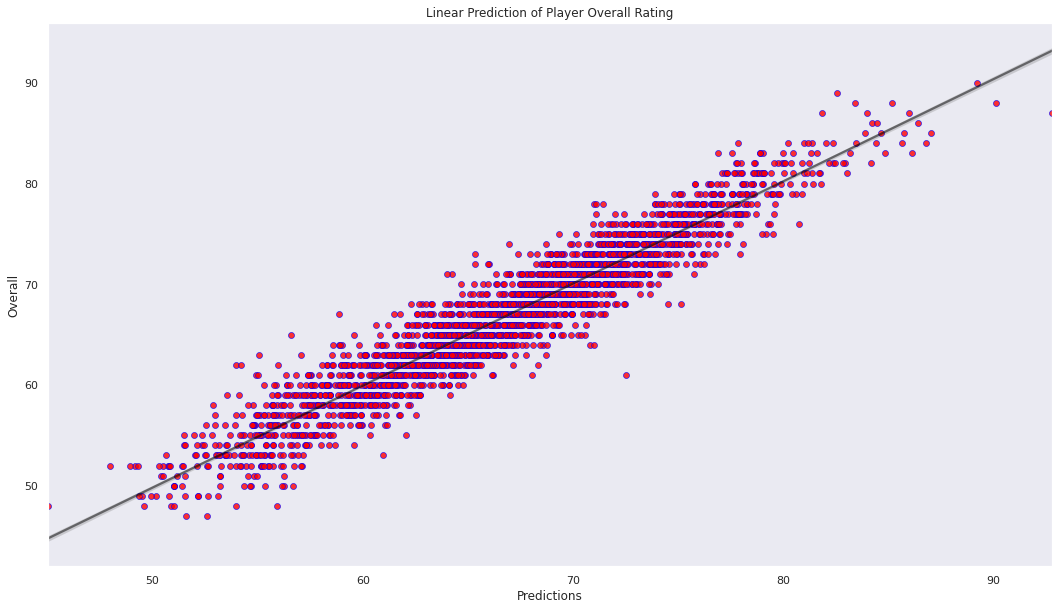

In [ ]:
# Visualising the results
plt.figure(figsize=(18,10))
sns.regplot(predictions,y_test,scatter_kws={'color':'red','edgecolor':'blue','linewidth':'0.7'},line_kws={'color':'black','alpha':0.5})
plt.xlabel('Predictions')
plt.ylabel('Overall')
plt.title("Linear Prediction of Player Overall Rating")
plt.show()

In [ ]:
model.coef_,model.intercept_

(array([ 3.56202324e-02,  6.87408497e-03,  2.96462836e-01,  1.07556143e-02,
         4.78481652e-02,  6.45846362e-02,  1.07559429e-01, -1.99272907e-03,
         4.81444837e-02, -2.24450756e-03,  2.75163231e-03, -1.43957369e-02,
         1.58687816e-01,  3.67187530e-02,  2.03289371e-02, -4.21477323e-03,
         2.99569661e-01, -1.11840112e-02,  4.13415269e-02, -2.51946908e-03,
         2.91241858e-02,  2.04864994e-02, -2.14781764e-02,  1.98005857e-04,
        -1.57162024e-02, -4.49207437e-02, -1.31902612e-02, -3.19957193e-03,
         7.92345603e-02,  1.58808474e-02,  1.73088957e-02, -1.93367237e-02,
         5.65008400e-02,  5.30806022e-02,  1.06564677e-02,  6.81338769e-02,
         7.17736767e-02, -1.67310316e-01,  4.51026802e-01, -2.83716486e-01,
         7.05177337e-02,  1.23634356e-01, -1.94152090e-01, -6.04613456e-01,
        -5.51837726e-01, -3.70927264e-01,  1.52737845e+00, -8.14181355e-01,
         1.10311825e+00, -8.44293467e-01,  4.25446135e+00, -1.43688254e+00,
        -2.2

* The r square is close to 1, meaning this prediction model is pretty accurate. Therefore, through linear regression, we can use all inputs to predict the overall rating for each player. 

# 6.Appendix - Raw data collection from website

Users can update the code here if more data needed to be collected in the future.

Note: Given the long running time, this part of code won't be run in class during the presentation.

In [ ]:
import requests
from lxml import etree
import pandas as pd
import numpy as np
import re
import time

In [ ]:
# Set URL, Headers
base_url = "https://sofifa.com/players?offset="
headers = {'User-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36'}
columns = ['ID', 'picture','Nationality' ,'name', 'age','position', 'overall', 'potential', 'club', 'value','wage']
data = pd.DataFrame(columns = columns)

In [ ]:
url = 'https://sofifa.com/players?offset=0'
# Use request function the request 
resp = requests.get(url=url, headers=headers)
# Store the data in etree
html = etree.HTML(resp.text)
# Use xpath to locate the information
tr1 = htmle/tbody/t.xpath('/html/body/div[1]/div/div/div[1]/div/tablr')[2]#
nationality=tr1.xpath('./td[2]/a[1]/div/img/@title')[0].strip()
nationality

'Netherlands'

In [ ]:
# Scraping the data of homepage
count=0
for offset in range(0, 300):
    url = base_url + str(offset * 61)
    resp = requests.get(url=url, headers=headers)
    html = etree.HTML(resp.text)
    # Store the sectors in a list
    trs = html.xpath('/html/body/div[1]/div/div/div[1]/div/table/tbody/tr')
    for tr1 in trs:
        URL = tr1.xpath('./td[2]/a[1]/@href')[0].strip()
        ID=URL.split('/')[2]
        nationality=tr1.xpath('./td[2]/a[1]/div/img/@title')[0].strip()
        if len(tr1.xpath('./td[1]/figure/img/@data-src')):
            picture = tr1.xpath('./td[1]/figure/img/@data-src')[0].strip()
        else:
            picture = np.nan
        name = tr1.xpath('./td[2]/a[1]/@data-tooltip')[0].strip()
        age = tr1.xpath('./td[3]/text()')[0].strip()
        position = tr1.xpath('./td[2]/a[2]/span/text()')[0].strip()
        overall = tr1.xpath('./td[4]/span/text()')[0].strip()
        potential = tr1.xpath('./td[5]/span/text()')[0].strip()
        if len(tr1.xpath('./td[6]/div/a/text()')):
            club = tr1.xpath('./td[6]/div/a/text()')[0].strip()
        else:
            club = np.nan
        value = tr1.xpath('./td[7]/text()')[0].strip()
        wage = tr1.xpath('./td[8]/text()')[0].strip()
        # Store the information in dataframe
        player_data = pd.DataFrame(
            [[ID,picture,nationality,name,age,position,overall,potential,club,value,wage]])
        player_data.columns = columns
        data = data.append(player_data, ignore_index=True)
 

KeyboardInterrupt: ignored

In [ ]:
data = data.drop_duplicates()
data.shape

In [ ]:
detailed_data=[]
count=0
skill_map = {}
for ID in data['ID']:   
    # After observing, I found that the detailed page of players are made in this format:
    url = 'https://sofifa.com/player/'+str(ID)
    print(url)
    # Rquest details
    resp = requests.get(url=url, headers=headers)
    html = etree.HTML(resp.text)
    skill_map = {}
    if len(html.xpath('/html/body/div[2]/div/div/div[1]/div[1]/div[8]/div/ul/li[6]/span/text()')):

        link_1 = html.xpath('/html/body/div[2]/div/div/div[1]/div[1]/div[2]/div/div[1]/div/ul')[0]
        skill_map['weak_foot'] = link_1.xpath('./li[2]/text()')[0].strip()
        skill_map['skill_moves'] = link_1.xpath('./li[3]/text()')[0].strip()
        skill_map['reputation'] = link_1.xpath('./li[4]/text()')[0].strip()
        meta_data= html.xpath('/html/body/div[2]/div/div/div[1]/div[1]/div[1]/div/div/div/text()')
        a=str(meta_data)
        skill_map['weight']=re.findall(r"\d+",a)[-1]
        skill_map['height']=re.findall(r"\d+",a)[-3]+'.'+re.findall(r"\d+",a)[-2]


        for i in range(5,8):
            number=str(i)
            key = link_1.xpath('./li[' + number + ']/label/text()')[0].strip()
            value = link_1.xpath('./li[' + number + ']/span/text()')[0].strip()
            skill_map[key]=value
        # Some player do not have 'release clause'
        if len(link_1.xpath('./li[8]/span/text()')):
            skill_map['release_clause'] = link_1.xpath('./li[8]/span/text()')[0].strip()
            skill_map['ID'] = link_1.xpath('./li[9]/text()')[0].strip()
        else:
            skill_map['release_clause'] = np.nan
            skill_map['ID'] = link_1.xpath('./li[8]/text()')[0].strip()

        for div in range(4,8):
            number = str(div)
            skill_datas = html.xpath('/html/body/div[2]/div/div/div[1]/div[1]/div[' + number + ']/div/ul/li')
            for skills in skill_datas:
                # Checking if there is a "+" before the ability
                if len(re.findall(r"\d",skills.xpath('./span[2]/text()')[0].strip())):
                    value = skills.xpath('./span/text()')[0].strip()
                    key = skills.xpath('./span[3]/text()')[0].strip()
                    skill_map[key]=value
                else:
                    value = skills.xpath('./span/text()')[0].strip()
                    key = skills.xpath('./span[2]/text()')[0].strip()
                    skill_map[key]=value


        skill_datas = html.xpath('/html/body/div[2]/div/div/div[1]/div[1]/div[8]/div/ul')[0]
        for i in range(1,6):
                # Checking if there is a "+" before the ability
                number=str(i)
                if len(re.findall(r"\d",skill_datas.xpath('./li[' + number + ']/span[2]/text()')[0].strip())):
                    value = skill_datas.xpath('./li[' + number + ']/span[1]/text()')[0].strip()
                    key = skill_datas.xpath('./li[' + number + ']/span[3]/text()')[0].strip()
                    skill_map[key]=value
                else:
                    value = skill_datas.xpath('./li[' + number + ']/span[1]/text()')[0].strip()
                    key = skill_datas.xpath('./li[' + number + ']/span[2]/text()')[0].strip()
                    skill_map[key]=value
        # Some pages do not have 'composure'
        if len(html.xpath('/html/body/div[2]/div/div/div[1]/div[1]/div[8]/div/ul/li[6]/span/text()')):
            skill_map['composure'] = html.xpath('/html/body/div[2]/div/div/div[1]/div[1]/div[8]/div/ul/li[6]/span/text()')[0].strip()
        else:
            skill_map['composure']=np.nan

        for div in range(9,10):
            number = str(div)
            skill_datas = html.xpath('/html/body/div[2]/div/div/div[1]/div[1]/div[' + number + ']/div/ul/li')
            for skills in skill_datas:
                if len(re.findall(r"\d",skills.xpath('./span[2]/text()')[0].strip())):
                    value = skills.xpath('./span/text()')[0].strip()
                    key = skills.xpath('./span[3]/text()')[0].strip()
                    skill_map[key]=value
                else:
                    value = skills.xpath('./span/text()')[0].strip()
                    key = skills.xpath('./span[2]/text()')[0].strip()
                    skill_map[key]=value


        skill_datas = html.xpath('/html/body/div[2]/div/div/div[1]/div[1]/div[10]/div/ul')[0]
        for i in range(1,6):
            number=str(i)

            value = skill_datas.xpath('./li[' + number + ']/span/text()')[0].strip()
            key = skill_datas.xpath('./li[' + number + ']/text()')[0].strip()
            skill_map[key]=value
        detailed_data.append(skill_map)
        # Set sleep time 
        time.sleep(0.5)
        # Count run times
        count+=1
        print(count)
    else:
        pass

In [ ]:
# Store data in dataframe and export to csv
detailed_data=pd.DataFrame(detailed_data)
detailed_data=detailed_data.iloc[:,0:44]
full_data = pd.merge(data, detailed_data, how = 'inner', on = 'ID')
full_data.to_csv("./fifa_new.csv") 

All data collected will be stored in a csv file from here.

To simplify, all business analysis will run based on the csv file stored on google dirve directly.


